# Objective:To classify movie reviews as positive or negative,based on the text content of the reviews.

## 1.Loading the IMDB dataset

In [46]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [47]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [48]:
train_labels[0]

1

In [49]:
max([max(sequence) for sequence in train_data])

9999

## 2.Preparing the data

In [50]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [51]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [53]:
y_train[0]

1.0

## 3.The model definition

In [54]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


## 3.Setting aside a validation set

In [55]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


## 4.Compiling the model

In [56]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


## 5.Training your model

In [57]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [58]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## 6.Plotting the training and validation loss

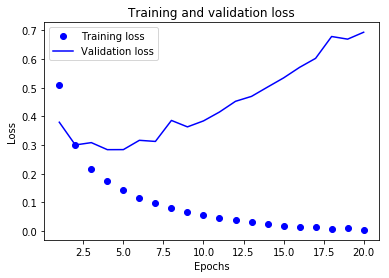

In [59]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(history_dict['acc'])+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 7.Plotting the training and validation accuracy

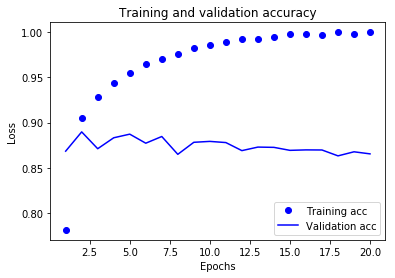

In [60]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Note:-we can see that our model clearly overfitting.after the second epoch ,we are overoptimizing on the training data, and we end up learning representations that are specific to the training data and don't generalize to data outsode of the training set.

## 8.Retraining a model from scratch

In [61]:
#model definition
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#compile our model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
#training our model
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=512)
#evaluate our model on test set
results=model.evaluate(x_test,y_test)

Epoch 1/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.1679 - acc: 0.9404
Epoch 5/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.1433 - acc: 0.9503
Epoch 6/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.1273 - acc: 0.9556
Epoch 7/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.1089 - acc: 0.9624
Epoch 8/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.0984 - acc: 0.9666
Epoch 9/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.0867 - acc: 0.9704
Epoch 10/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.0761 - a

In [62]:
results

[0.7951361747264862, 0.84832]

In [67]:
predictions=model.predict(x_test)

In [68]:
predictions[10]

array([0.99804735], dtype=float32)

In [69]:
predictions[10].shape

(1,)

In [87]:
predictions

array([[0.02052107],
       [1.        ],
       [0.9972484 ],
       ...,
       [0.03081152],
       [0.00920254],
       [0.947458  ]], dtype=float32)